In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

data_path = os.path.join('../data')
csvs_path = os.path.join('../results/csvs')

In [2]:
# parking_data = pd.read_csv(os.path.join(data_path, 'IrvineSpectrumCenter_parking_2022-11_to_2023-03.csv'))
# display(parking_data.head(1))
# parking_data['time_bucket'] = pd.to_datetime(parking_data['dt_start_date'])
# parking_data['time_bucket'] = parking_data['time_bucket'].dt.tz_convert('US/Pacific')
# X = pd.read_csv(os.path.join(csvs_path, 'newest_training_data.csv'))
# X['timestamp'] = pd.to_datetime(X['timestamp'])

# X.set_index('timestamp', inplace=True)
# parking_data.set_index('time_bucket', inplace=True)

# print('parking_data', parking_data.shape)
# display(parking_data.head(1))

# print('X', X.shape)
# display(X.head(1))

In [73]:
# X = pd.read_csv('../results/csvs/training_data_2022-11_to_2023-03.csv')
# X = pd.read_csv('../results/csvs/corrected_training_data_2022-11_to_2023-03.csv')
# X = pd.read_csv('../results/csvs/newest_training_data.csv')
X = pd.read_csv('../results/csvs/QFC_training_data_with_n=8.csv')
parking_data = pd.read_csv('../data/IrvineSpectrumCenter_parking_2022-11_to_2023-03.csv')
lot_ids = list(X['pk_lot'].unique())
parking_data = parking_data[parking_data['pk_lot'].isin(lot_ids)]

# convert timestamp to datetime when the rows have different timezones
X['timestamp'] = pd.to_datetime(X['timestamp'], utc=True)
X['timestamp'] = X['timestamp'].dt.tz_convert('US/Pacific')

# sort by timestamp
X = X.sort_values(by=['timestamp'])
X['timestamp'] = X['timestamp'].dt.tz_convert('US/Pacific')

parking_data['dt_start_date'] = pd.to_datetime(parking_data['dt_start_date'])
parking_data['dt_start_date'] = parking_data['dt_start_date'].dt.round('h')
# parking_data['dt_start_date'] = parking_data['dt_start_date'].dt.tz_convert('US/Pacific')
parking_data.drop(columns=['dt_end_date', 'pk_lot_alias', 'f_occupancy_rank'], inplace=True)
X = X.sort_values(by=['timestamp'])
parking_data = parking_data.sort_values(by=['dt_start_date'])

X.set_index('timestamp', inplace=True, drop=False)
parking_data.set_index('dt_start_date', inplace=True, drop=False)
# remove all the rows from parking_data
parking_data = parking_data.iloc[0:2]

display(X.head(10))
display(parking_data.head(10))

,timestamp,pk_lot,wasserstein,avg_hotspot_distance,avg_log_prob,weighted_hotspot_distance,weighted_log_prob,probe_count,nth_car_time
timestamp,,,,,,,,,
2022-11-01 00:00:00-07:00,2022-11-01 00:00:00-07:00,1,0.654902,0.011501,14.393633,0.009047,14.449549,0,0 days 06:46:44
2022-11-01 01:00:00-07:00,2022-11-01 01:00:00-07:00,1,0.627242,0.011501,14.393633,0.009047,14.449549,0,0 days 07:46:44
2022-11-01 02:00:00-07:00,2022-11-01 02:00:00-07:00,1,0.583499,0.011501,14.393633,0.009047,14.449549,0,0 days 08:46:44
2022-11-01 03:00:00-07:00,2022-11-01 03:00:00-07:00,1,0.698635,0.011501,14.393633,0.009047,14.449549,0,0 days 09:46:44
2022-11-01 04:00:00-07:00,2022-11-01 04:00:00-07:00,1,0.674866,0.011501,14.393633,0.009047,14.449549,0,0 days 10:46:44
2022-11-01 05:00:00-07:00,2022-11-01 05:00:00-07:00,1,0.613344,0.011501,14.393633,0.009047,14.449549,0,0 days 11:46:44
2022-11-01 06:00:00-07:00,2022-11-01 06:00:00-07:00,1,0.804577,0.005547,14.369173,0.005705,14.391144,6,0 days 08:59:49
2022-11-01 07:00:00-07:00,2022-11-01 07:00:00-07:00,1,1.076331,0.008281,14.410690,0.009565,14.360402,6,0 days 01:31:29
2022-11-01 08:00:00-07:00,2022-11-01 08:00:00-07:00,1,1.267766,0.013144,14.227011,0.015458,14.119718,3,0 days 01:49:59


,dt_start_date,i_avail,i_occ,f_pct_occ,pk_lot,location,geometry
dt_start_date,,,,,,,


In [75]:
lot_ids = list(X['pk_lot'].unique())
lot_ids

[1]

In [79]:
lot_id = random.choice(lot_ids)
start_day = 1 #random.randint(1, 29)
end_day = start_day + 5 # random.randint(start_day + 1, min(30, start_day + 10))
start_time = pd.to_datetime(f'2023-01-{start_day} 00:00:00-08:00')
end_time = pd.to_datetime(f'2023-01-{end_day} 00:00:00-08:00')
print(f'getting data for lot {lot_id} from {start_time} to {end_time}')

getting data for lot 1 from 2023-01-01 00:00:00-08:00 to 2023-01-06 00:00:00-08:00


In [80]:
# wasserstein and avg_hotspot_distance usually between 0 and 1
X['adjusted wasserstein'] = 100 * ((X['wasserstein'] - X['wasserstein'].min()) / (X['wasserstein'].max() - X['wasserstein'].min()))
X['adjusted avg_hotspot_distance'] = 100 * ((X['avg_hotspot_distance'] - X['avg_hotspot_distance'].min()) / (X['avg_hotspot_distance'].max() - X['avg_hotspot_distance'].min()))
X['adjusted avg_log_prob'] = 100 * ((X['avg_log_prob']) - X['avg_log_prob'].min()) / (X['avg_log_prob'].max() - X['avg_log_prob'].min())
X['nth_car_time'] = pd.to_timedelta(X['nth_car_time'])
X['adjusted nth_car_time'] = 100 * ((X['nth_car_time'] - X['nth_car_time'].min()) / (X['nth_car_time'].max() - X['nth_car_time'].min()))

# for feat in ['adjusted wasserstein', 'adjusted avg_hotspot_distance', 'adjusted avg_log_prob', 'adjusted nth_car_time']:
#     # smooth feature
#     X[feat] = X[feat].rolling(window=3).mean()

# filter by lot
ground_truth_df = parking_data[parking_data['pk_lot'] == lot_id]
X_lot = X[X['pk_lot'] == lot_id].copy()

# filter by time
# ground_truth_df = ground_truth_df[(ground_truth_df.index >= start_time) & (ground_truth_df.index<= end_time)]
X_lot = X_lot[(X_lot.index >= start_time) & (X_lot.index <= end_time)]
# print(ground_truth_df.shape)
print(X_lot.shape)

(121, 13)


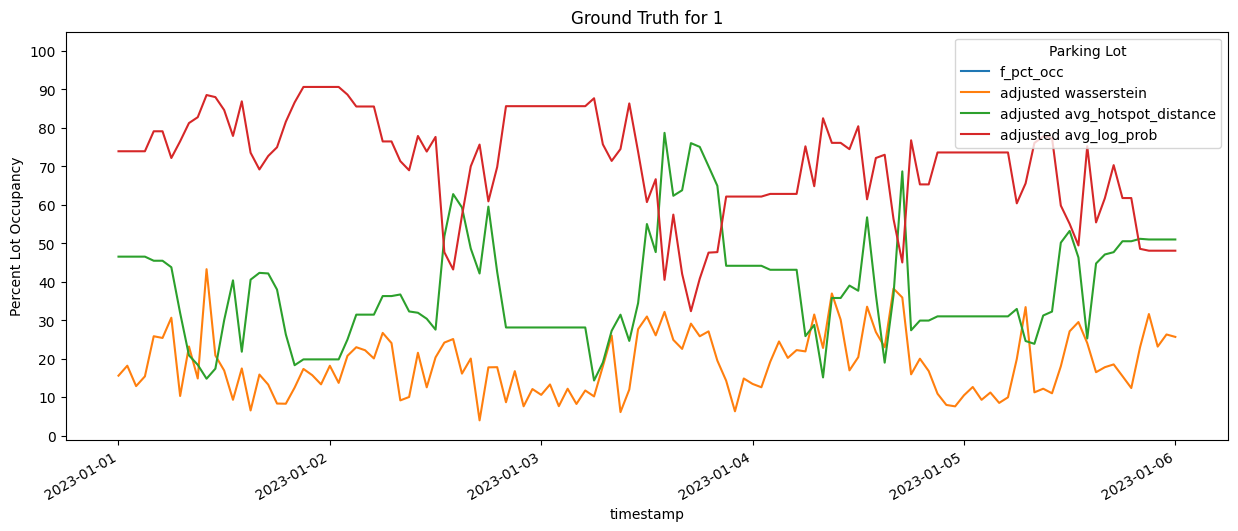

In [81]:
plt.figure(figsize=(15, 6))
ground_truth_df['f_pct_occ'].plot(legend=True)

# plot the wasserstein distance from X as well
X_lot['adjusted wasserstein'].plot(legend=True)

# plot the distance from hotspots
X_lot['adjusted avg_hotspot_distance'].plot(legend=True)

# plot the log probabilities
X_lot['adjusted avg_log_prob'].plot(legend=True)

# plot the nth_car_time
# X_lot['adjusted nth_car_time'].plot(legend=True)

plt.yticks(np.arange(0, 110, 10))
plt.title(f'Ground Truth for {lot_id}')
plt.ylabel('Percent Lot Occupancy')
plt.legend(title='Parking Lot')
plt.ylim(-1, 105)
plt.show()

Plot the distribution of features throughout time

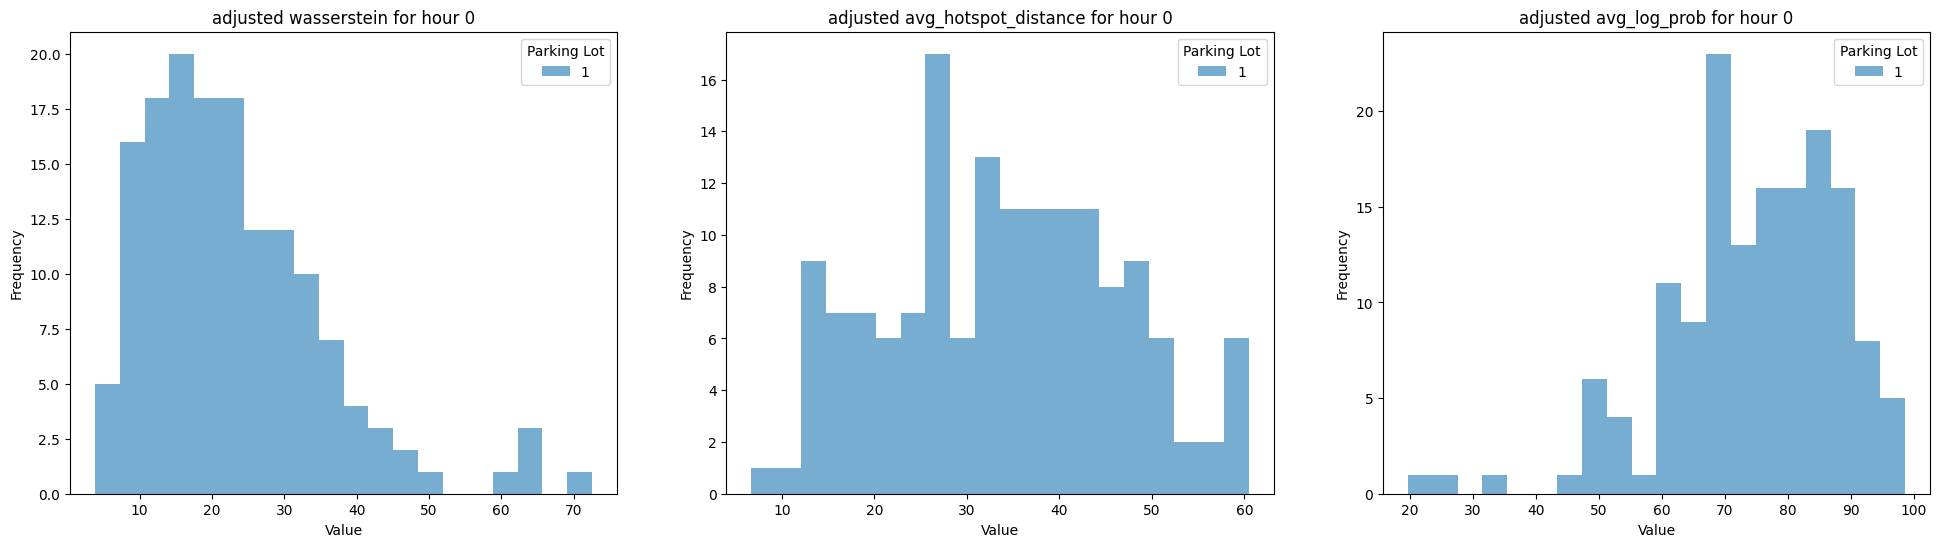

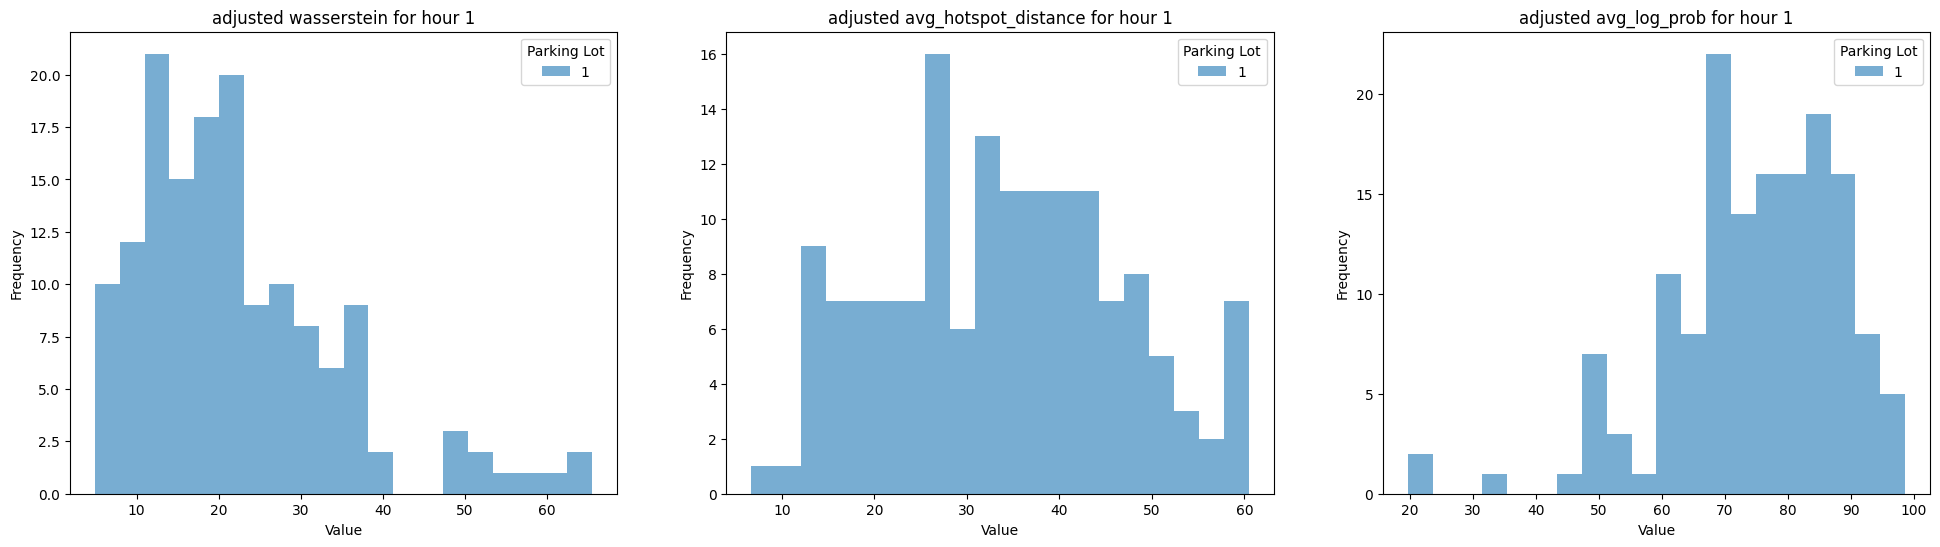

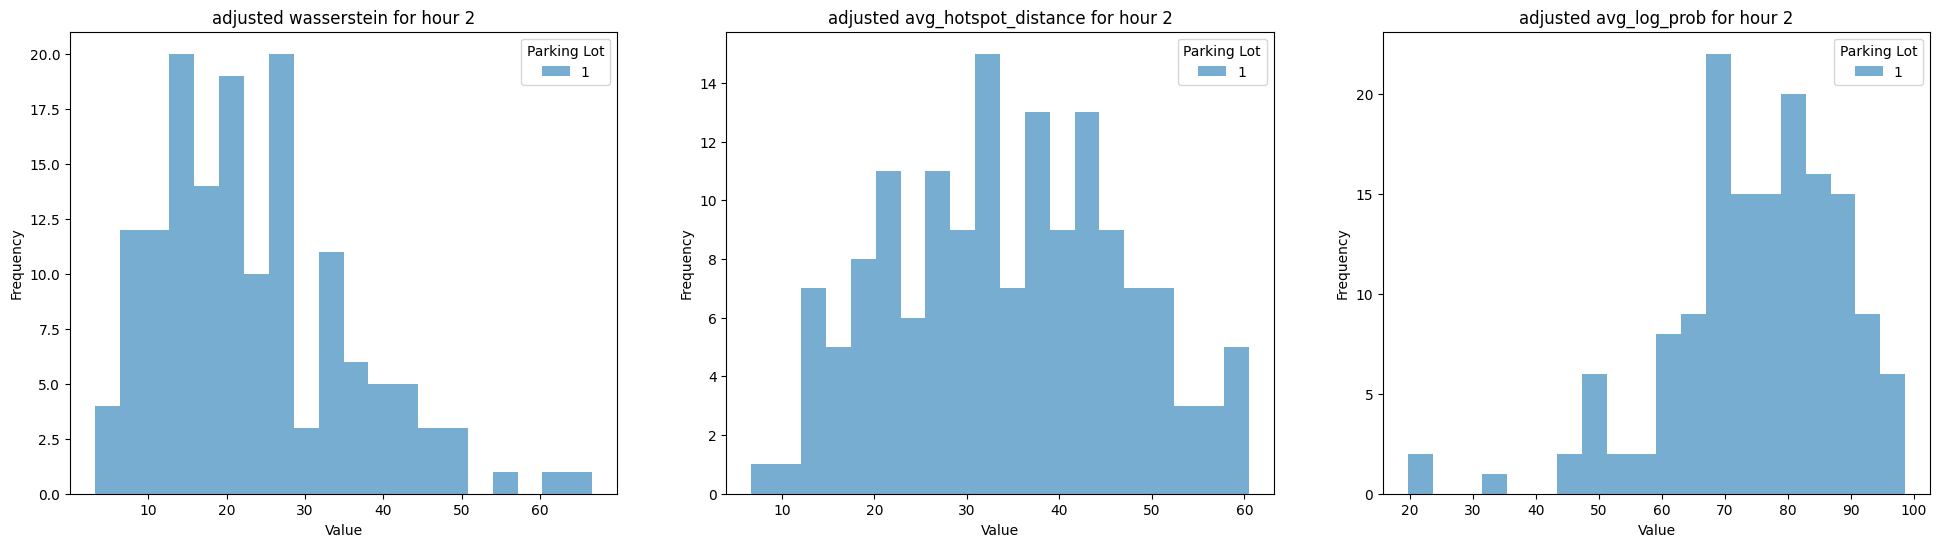

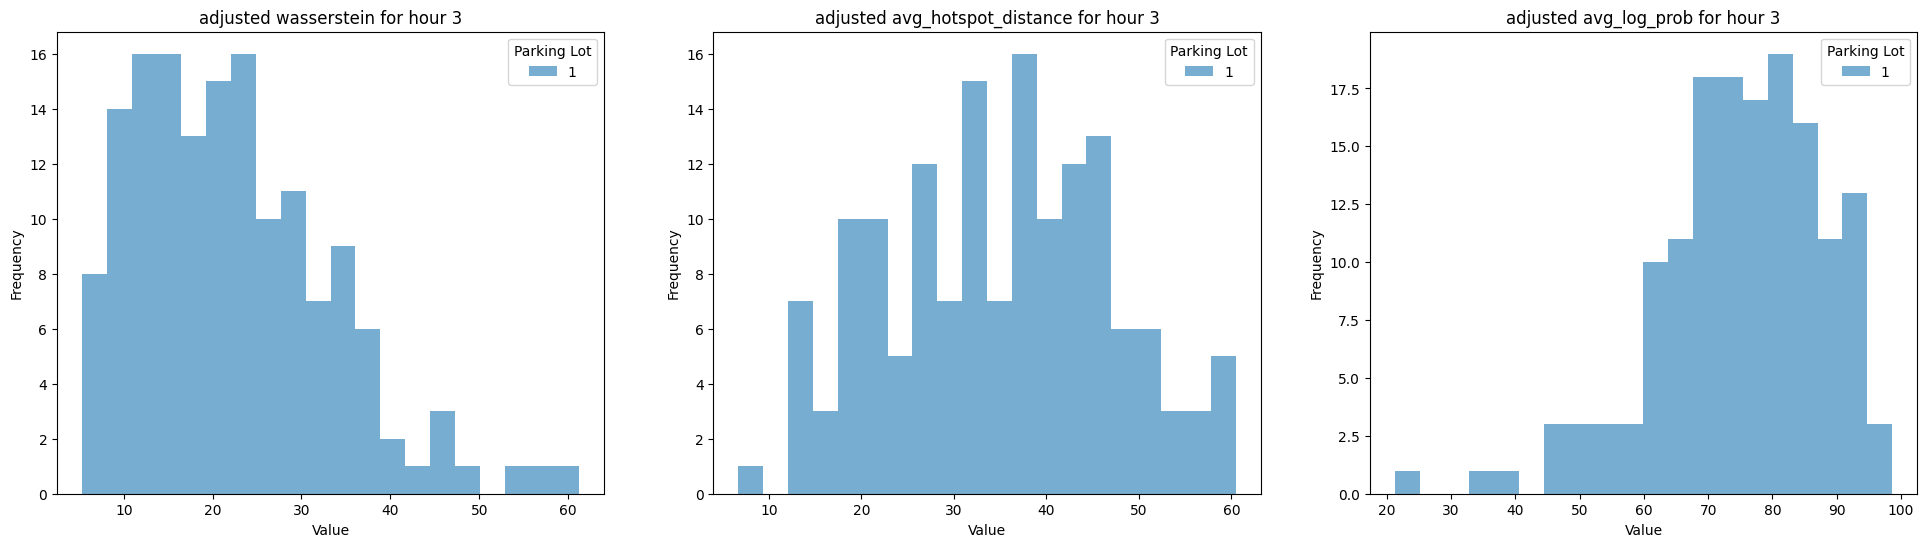

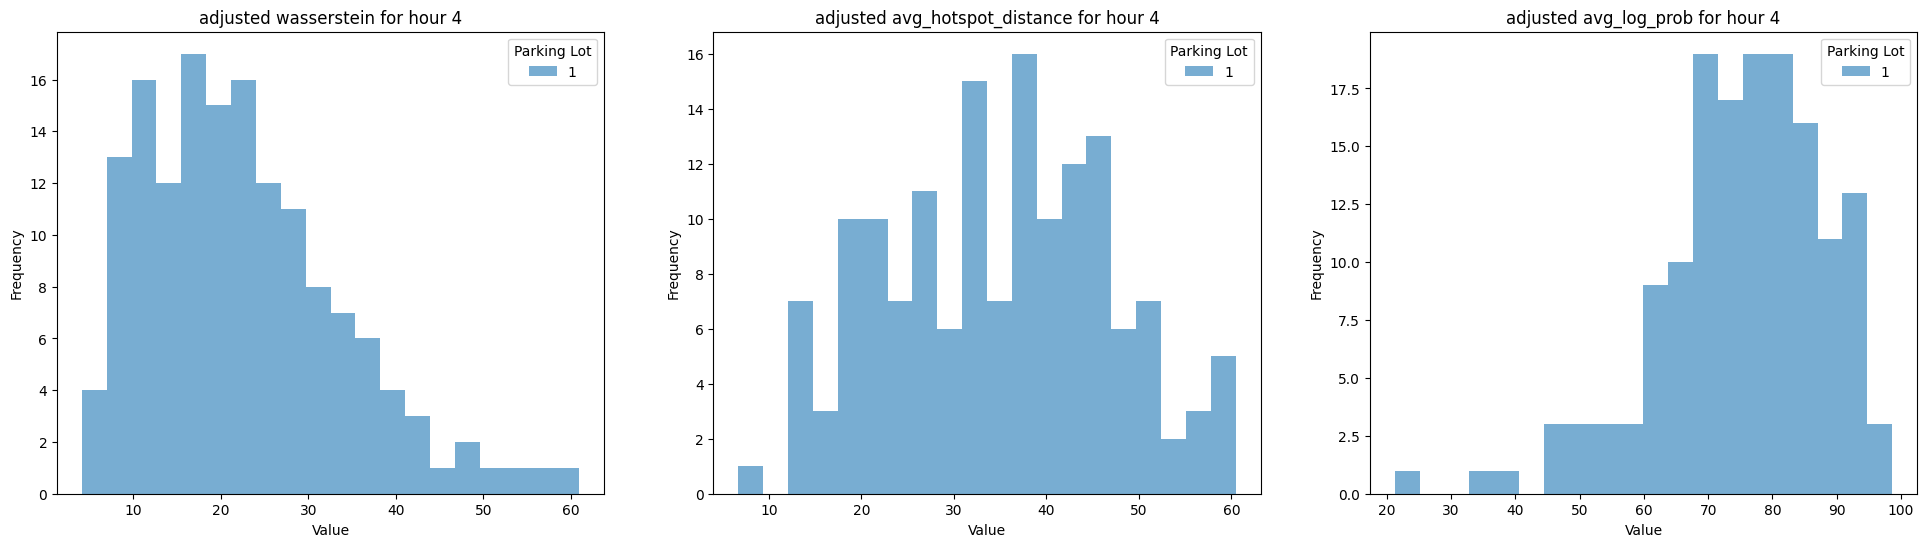

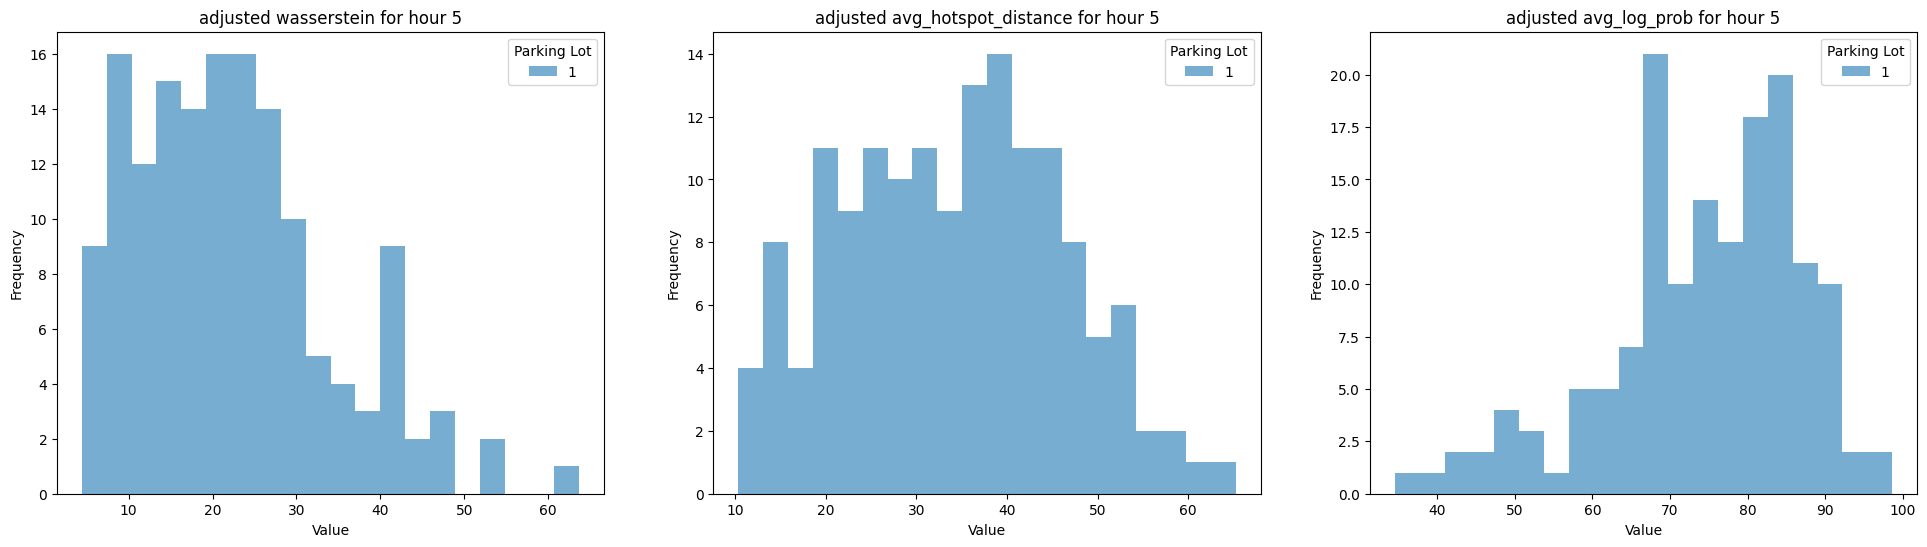

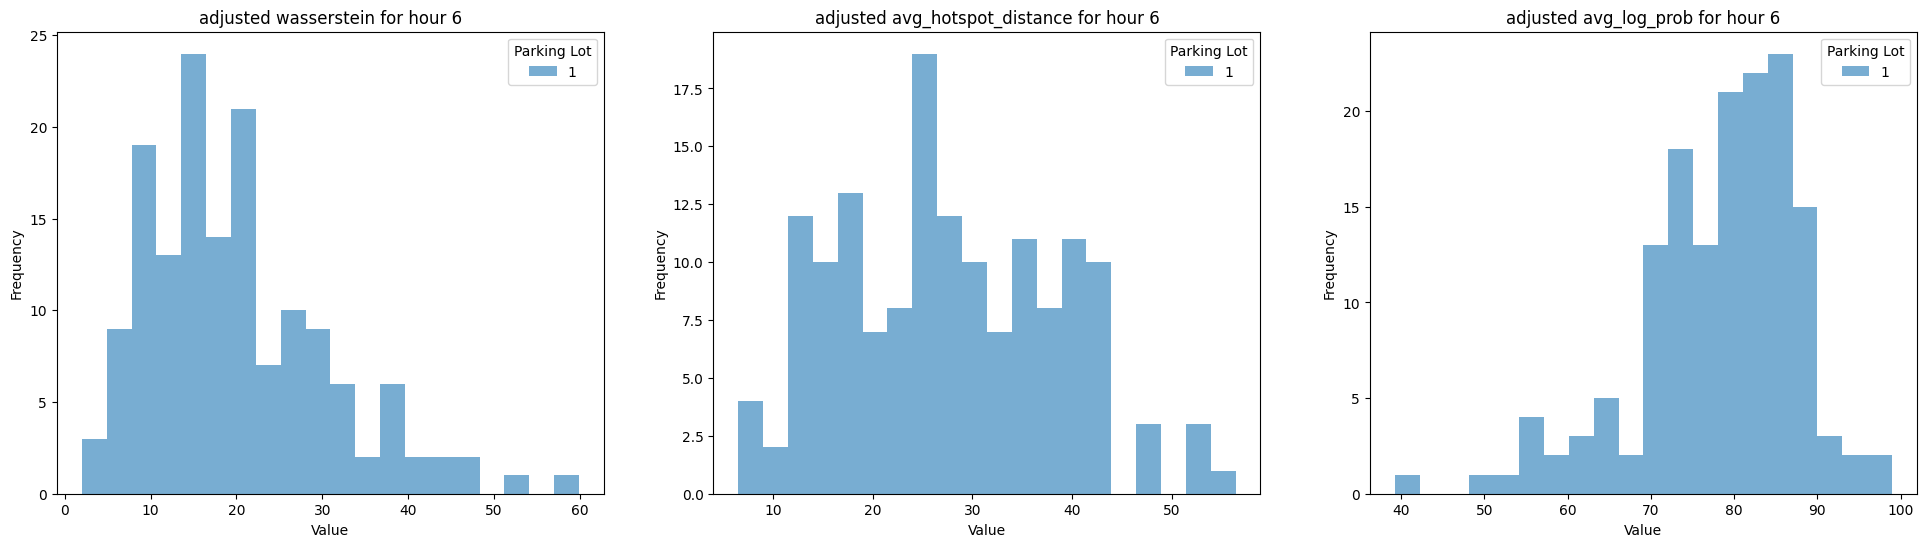

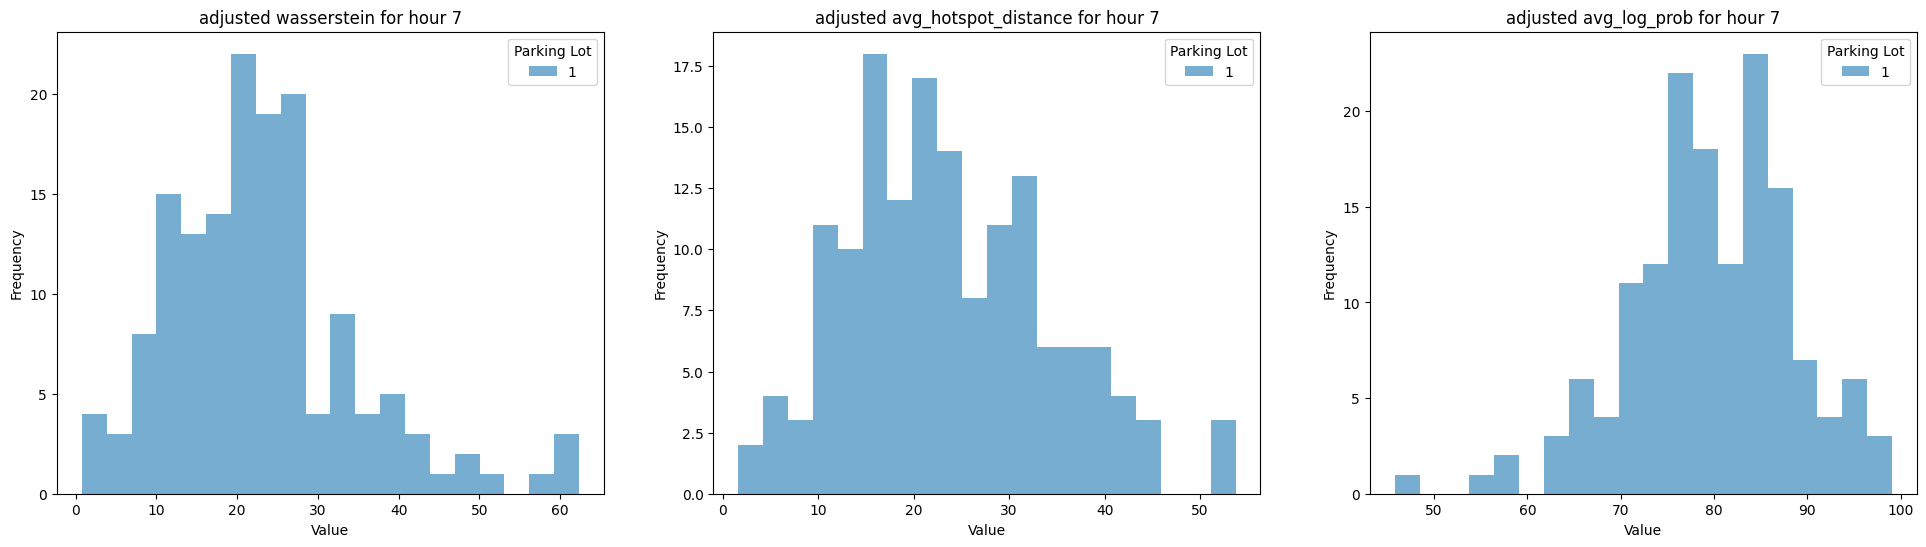

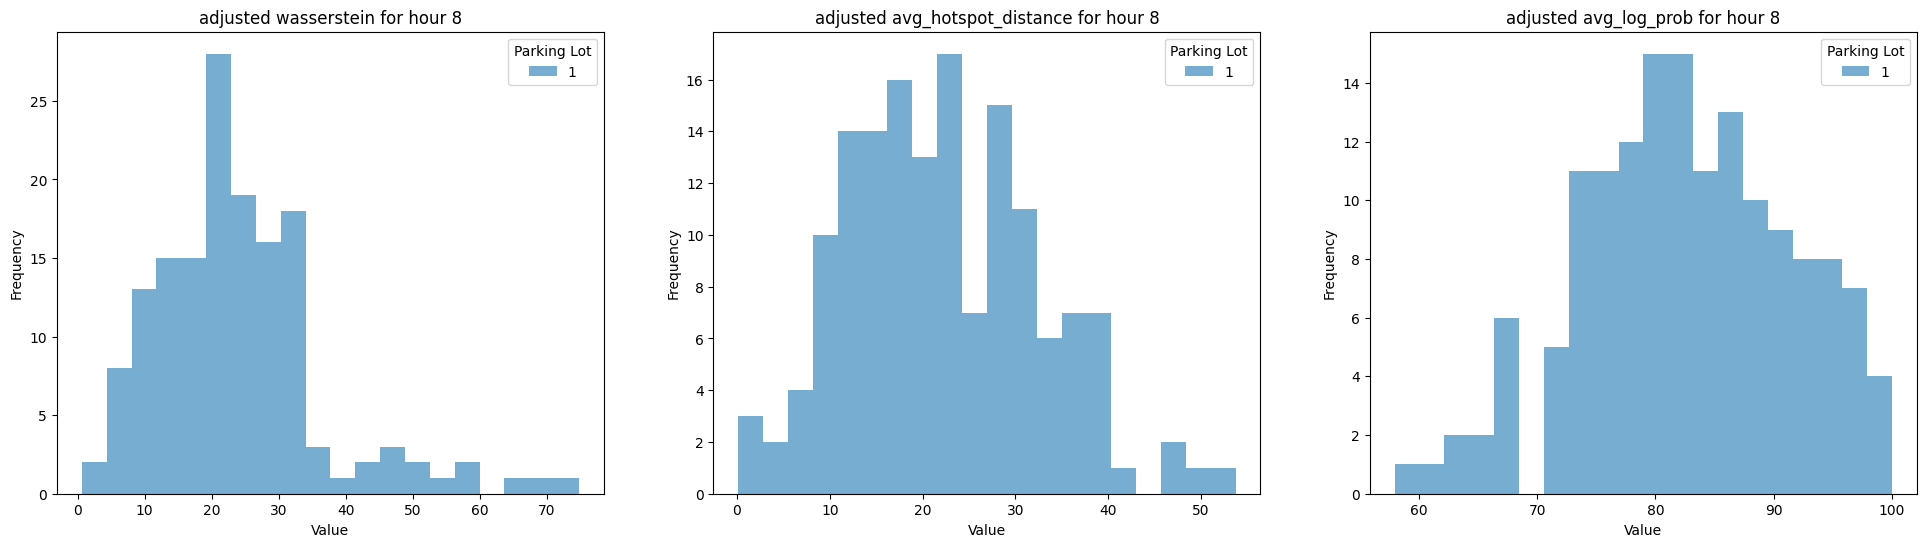

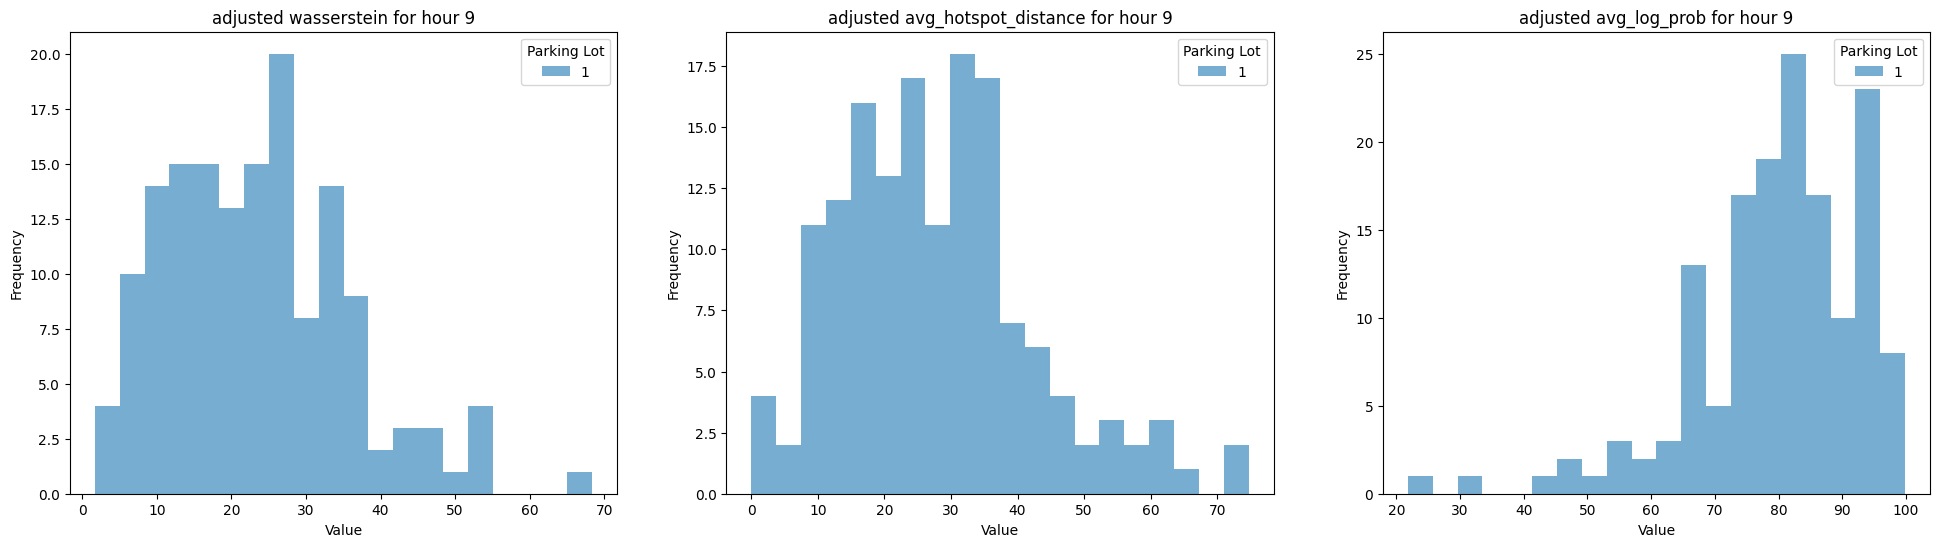

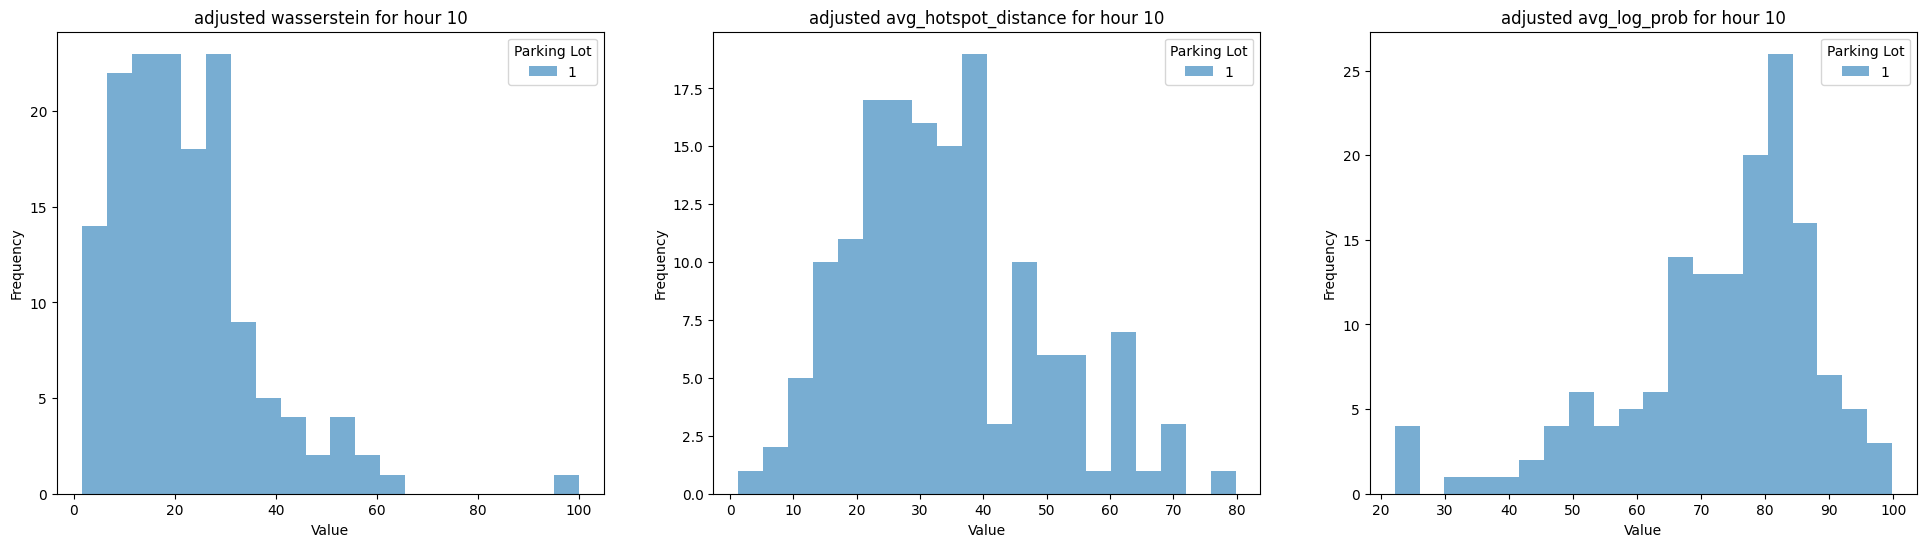

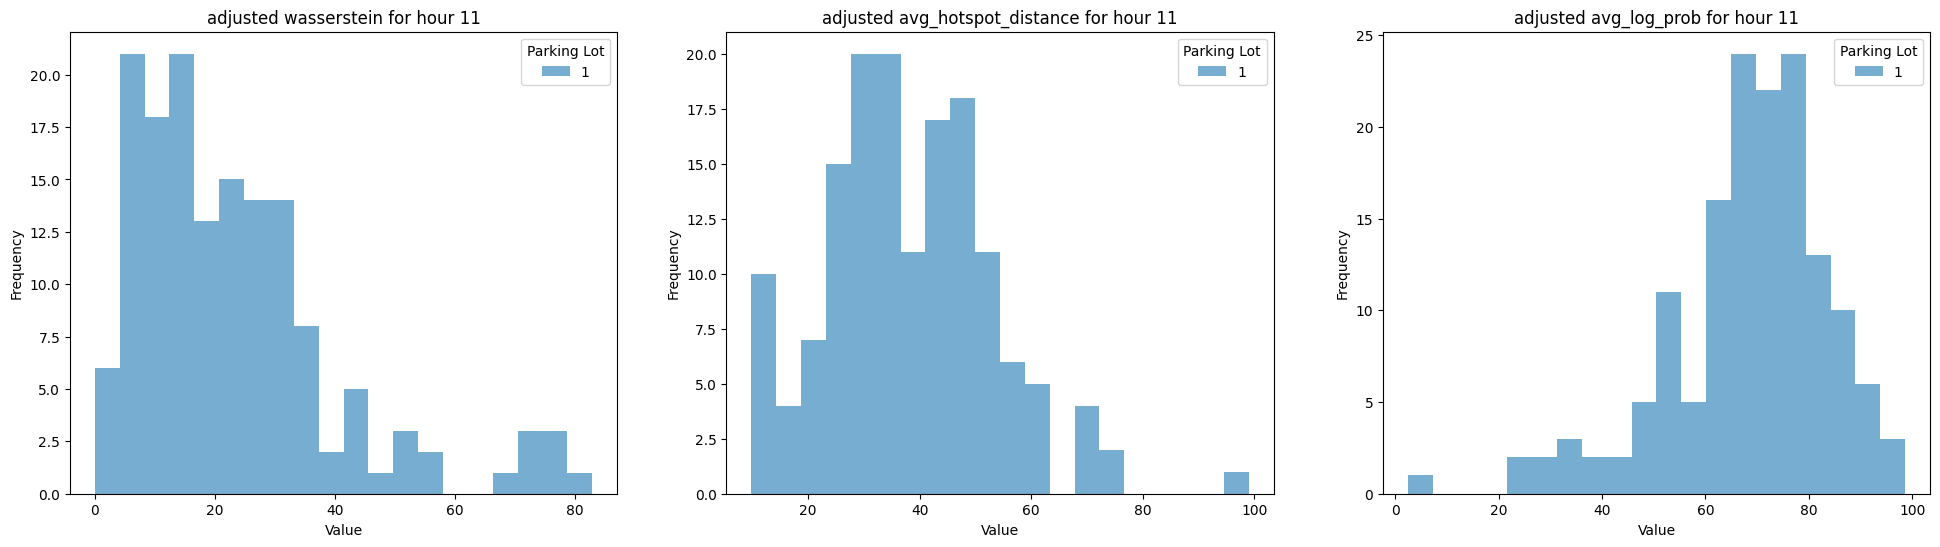

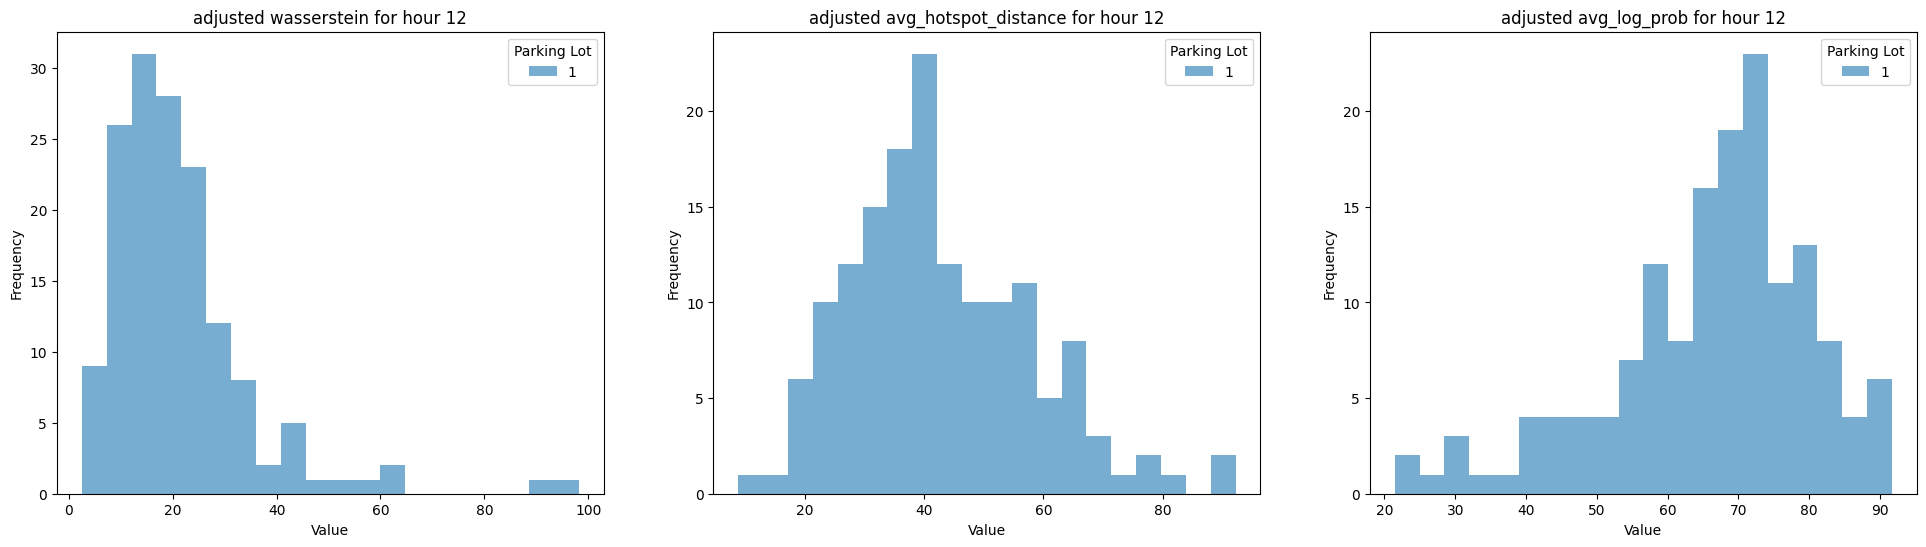

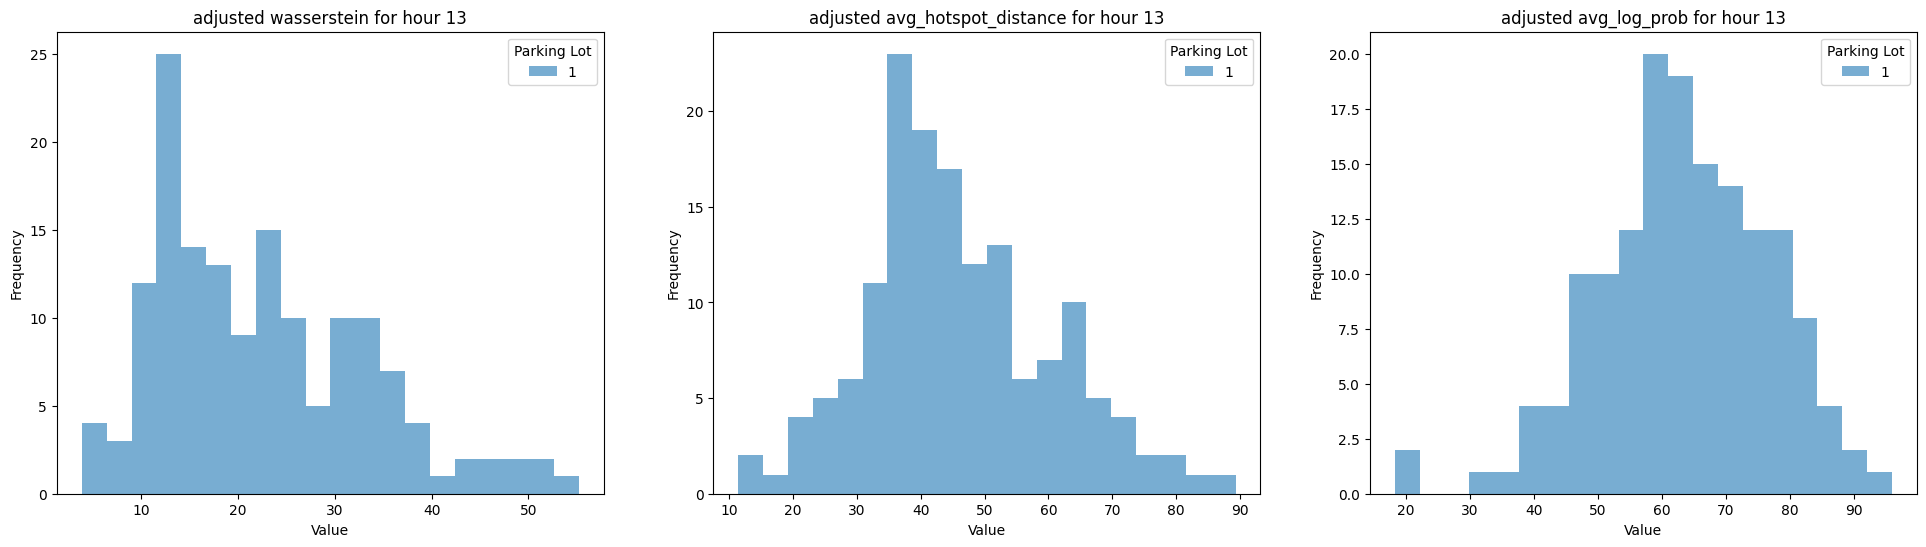

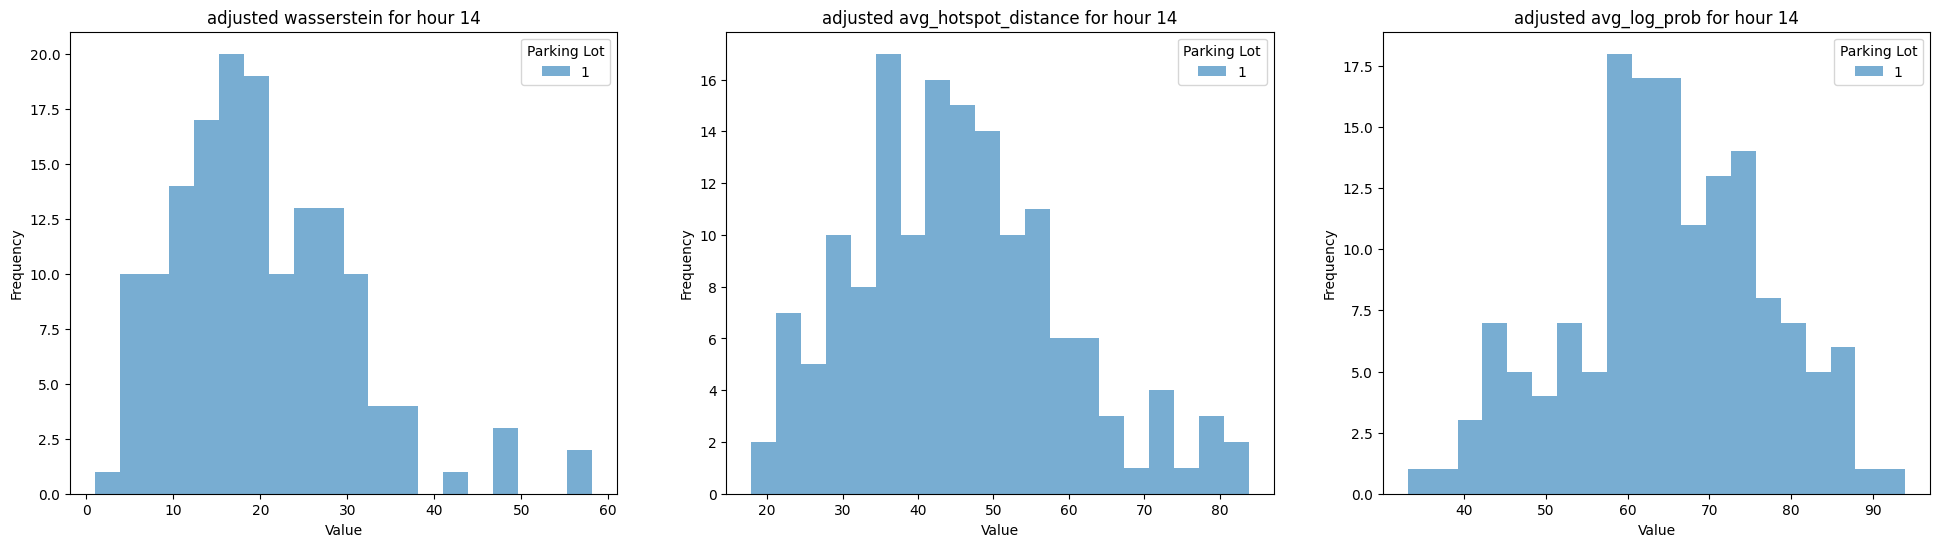

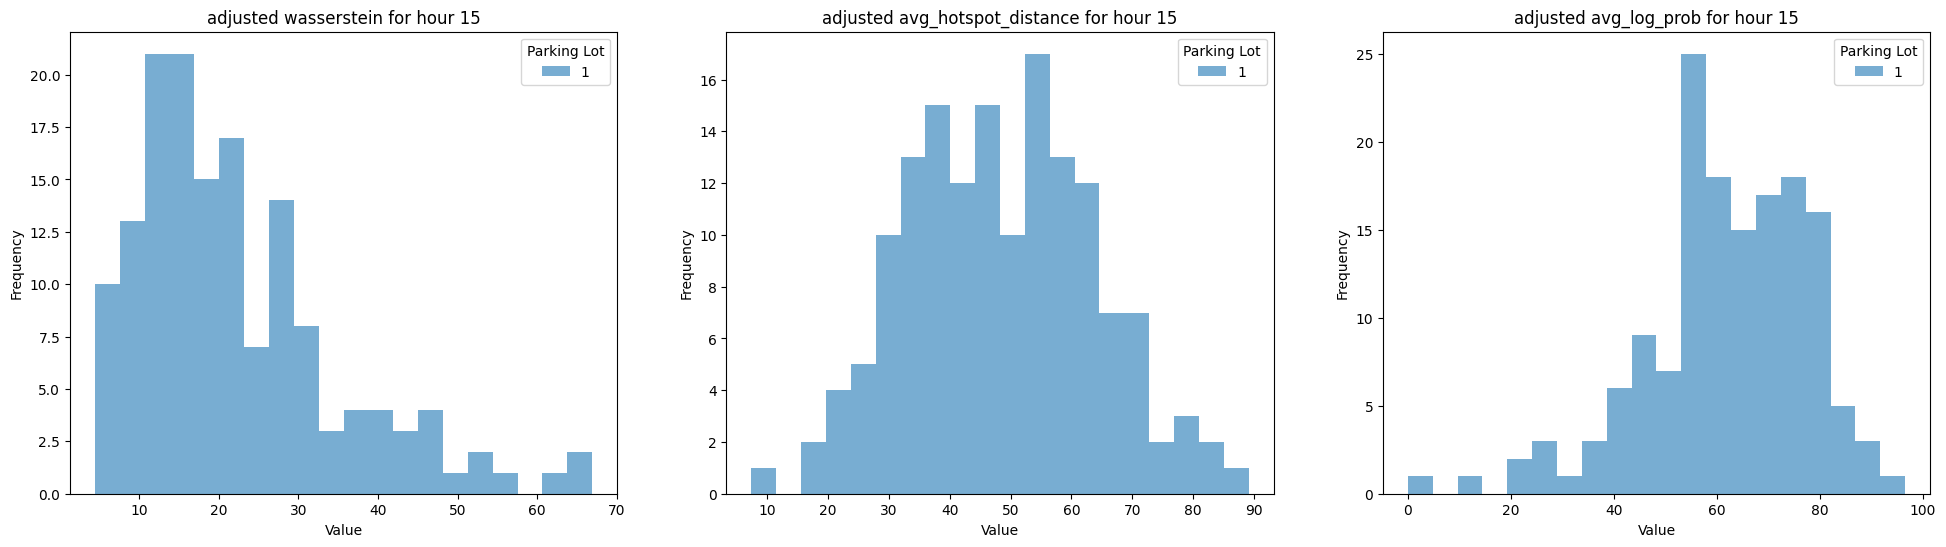

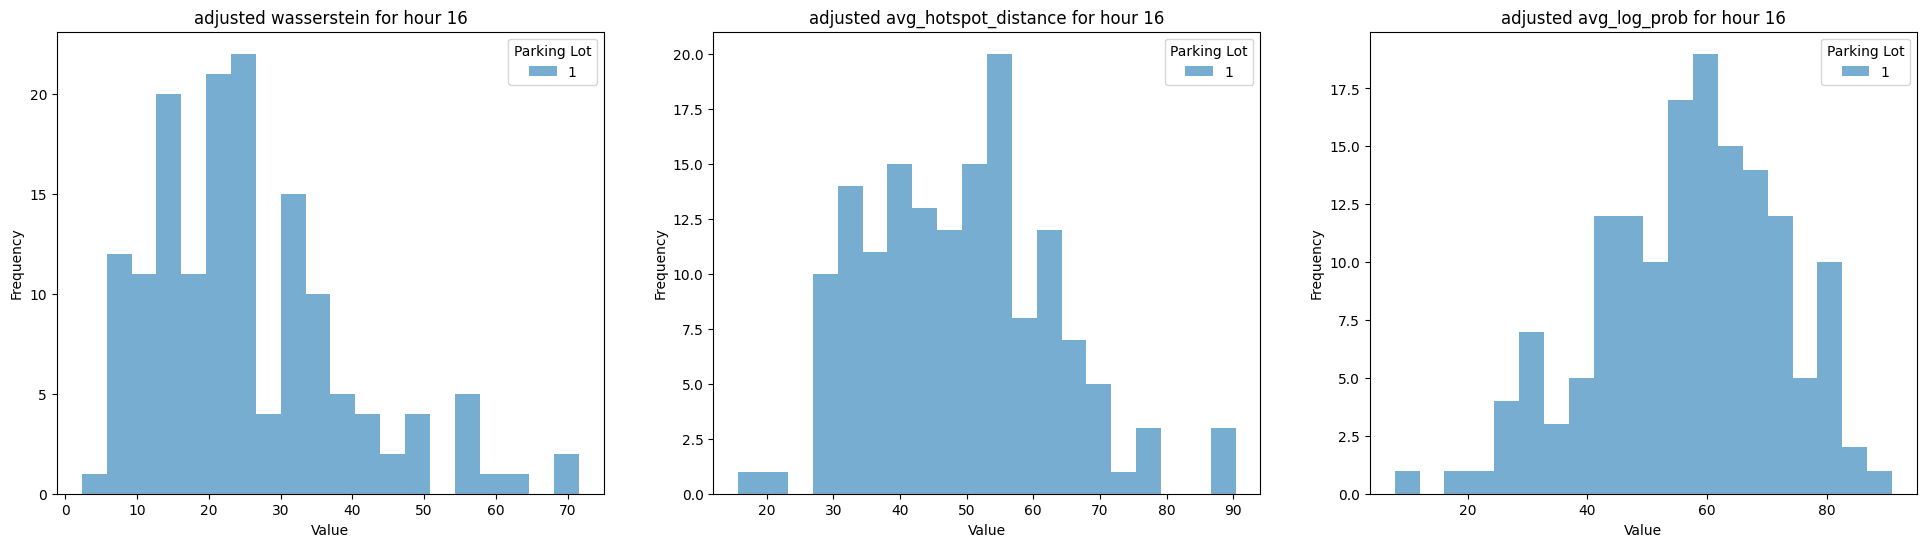

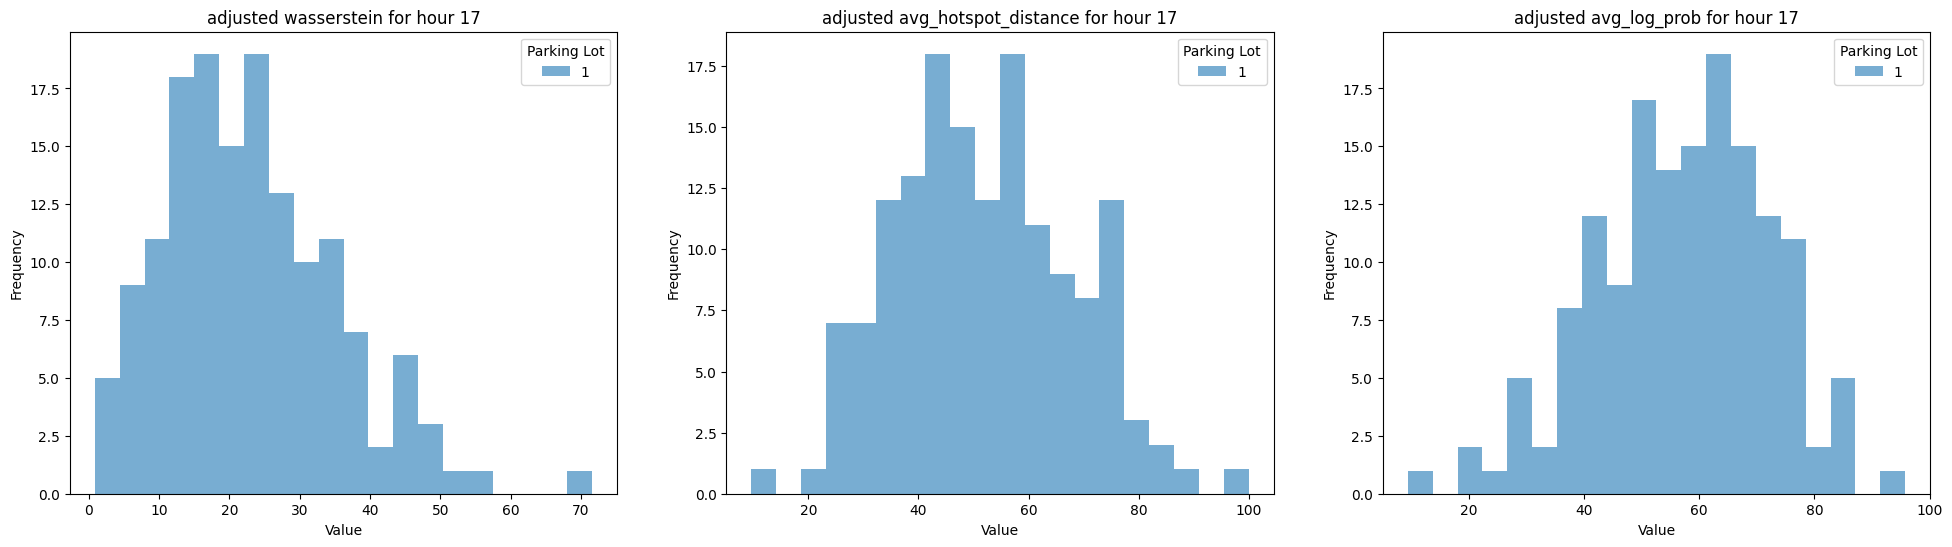

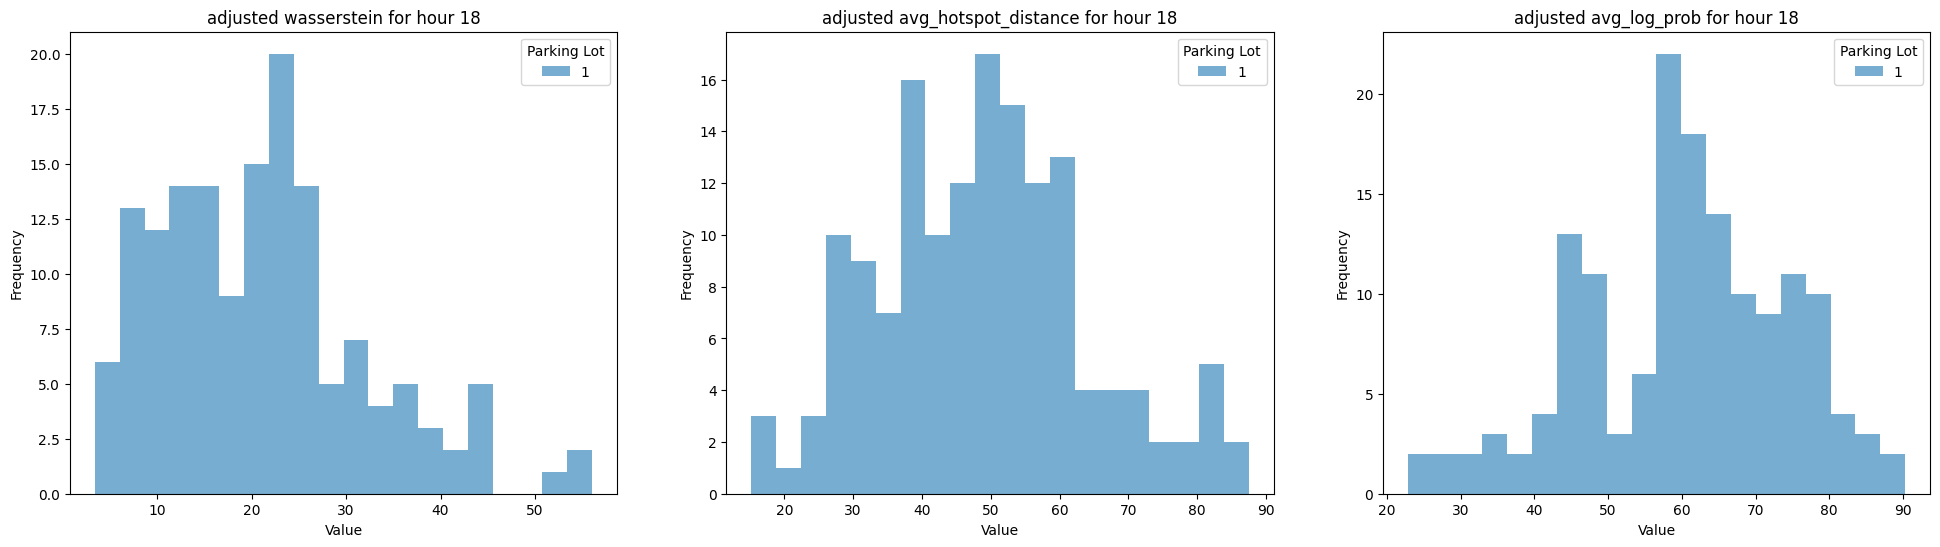

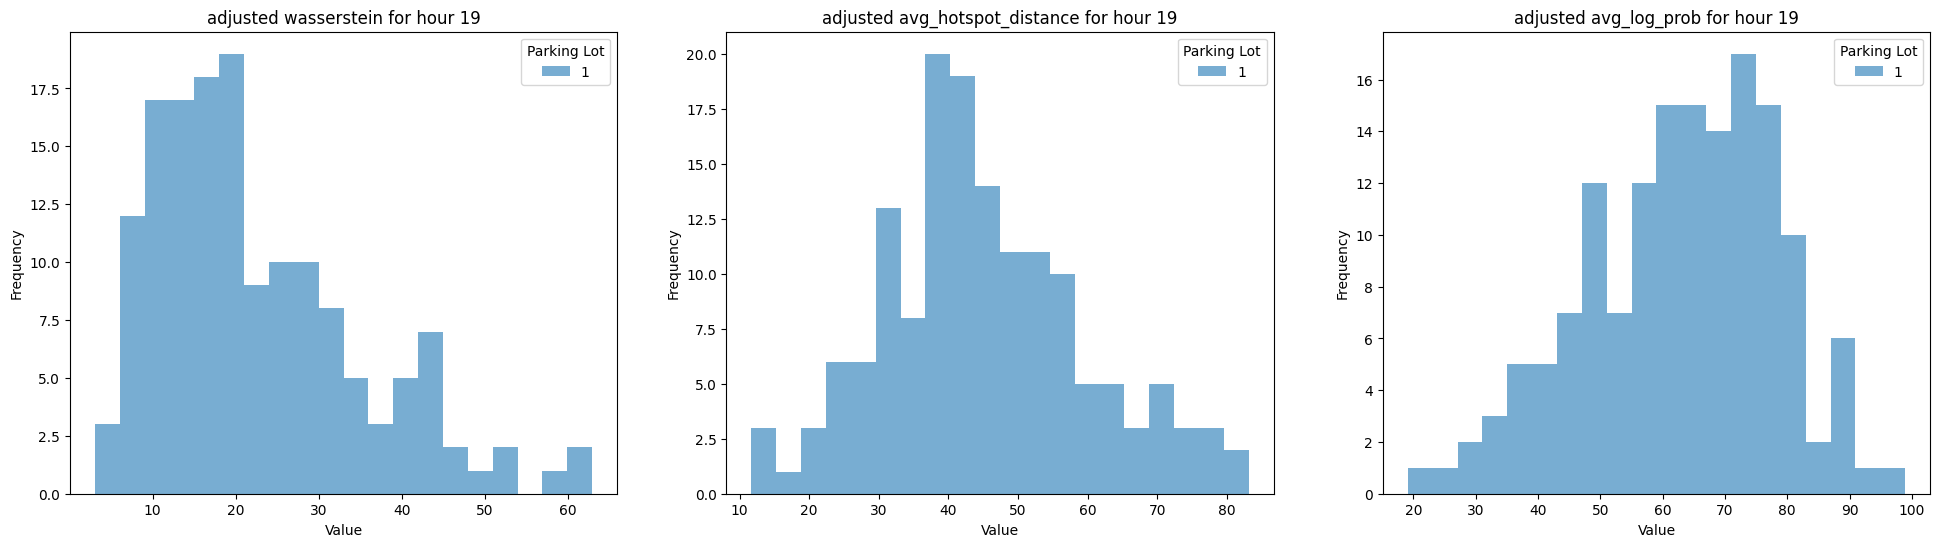

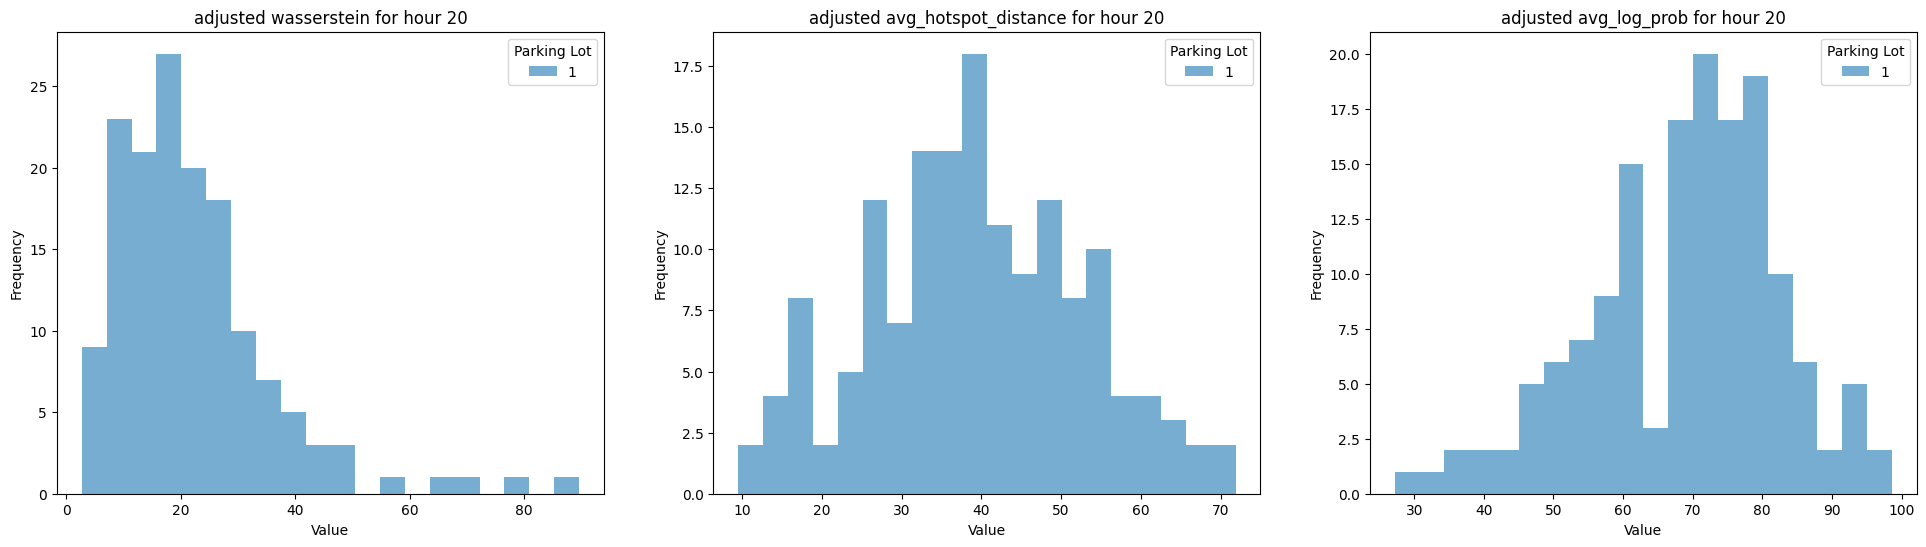

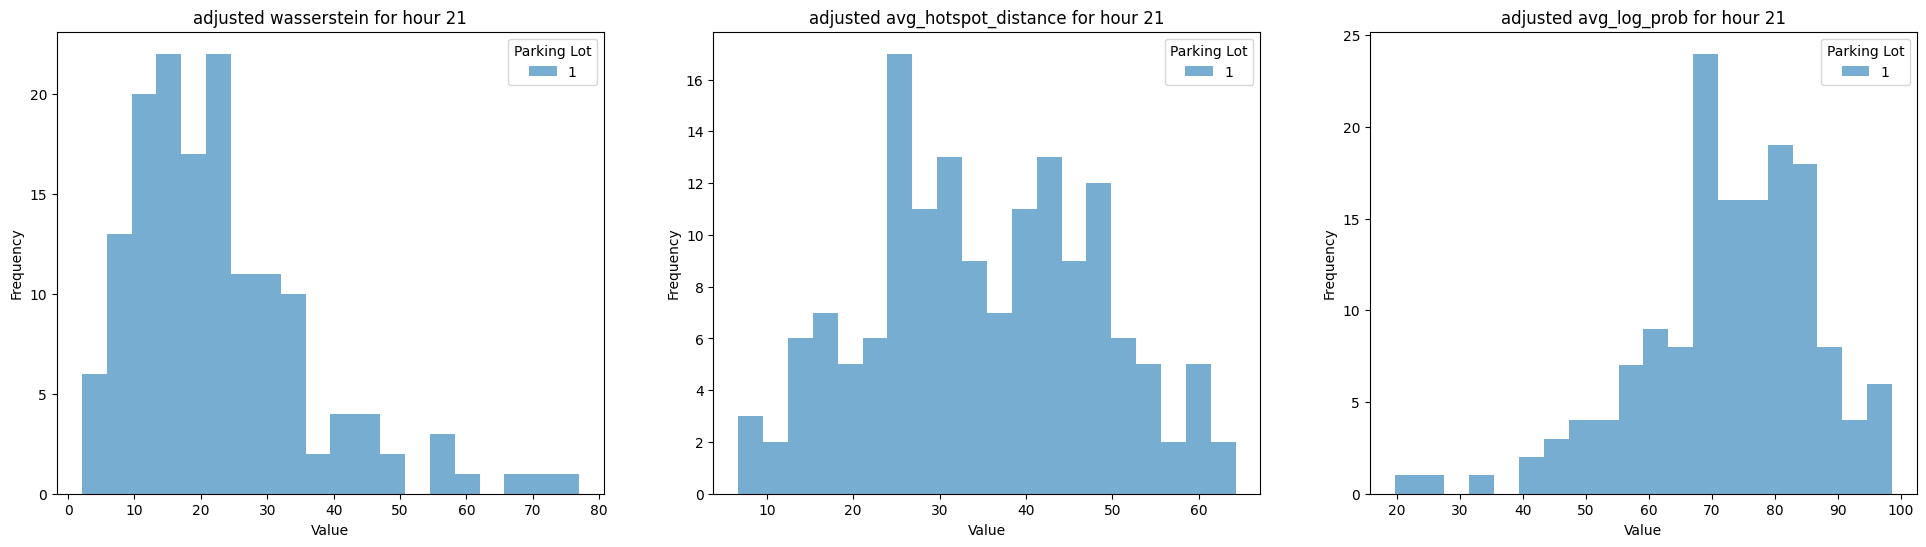

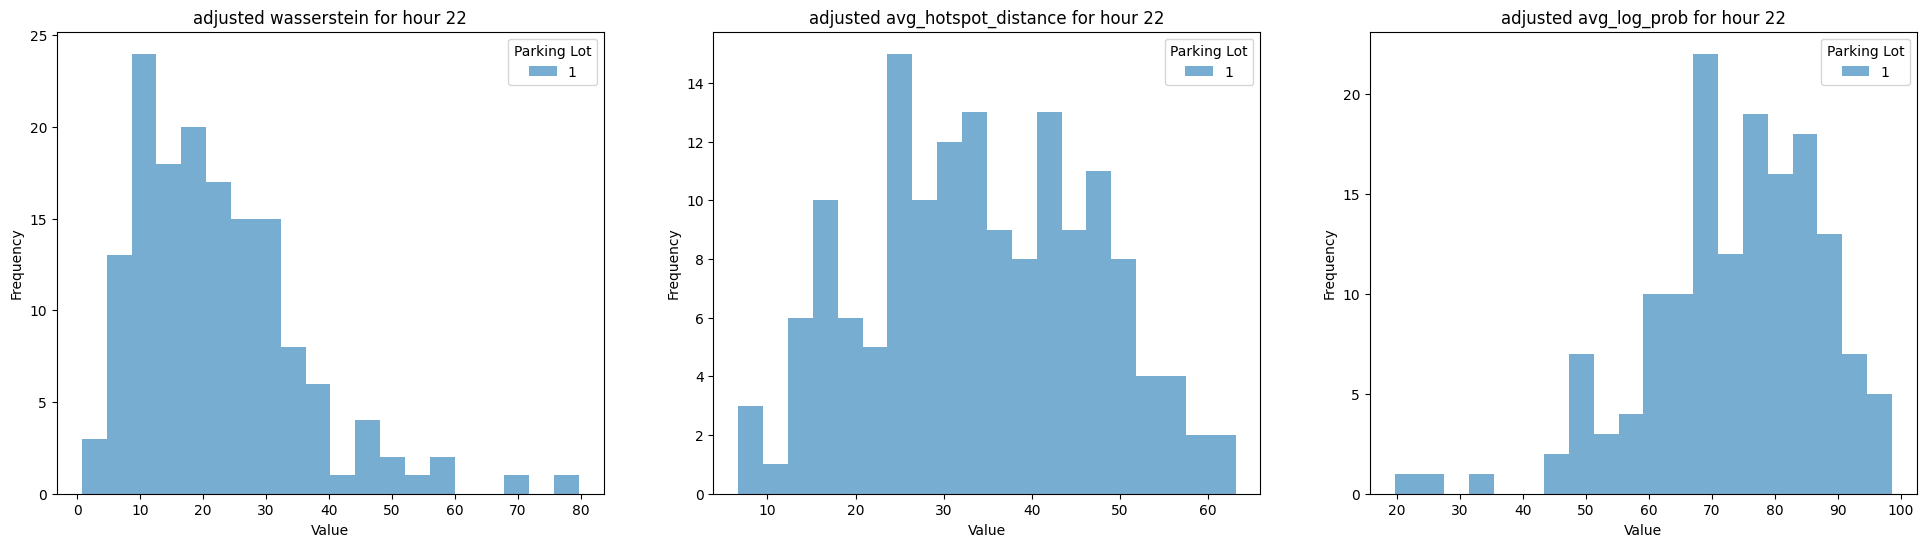

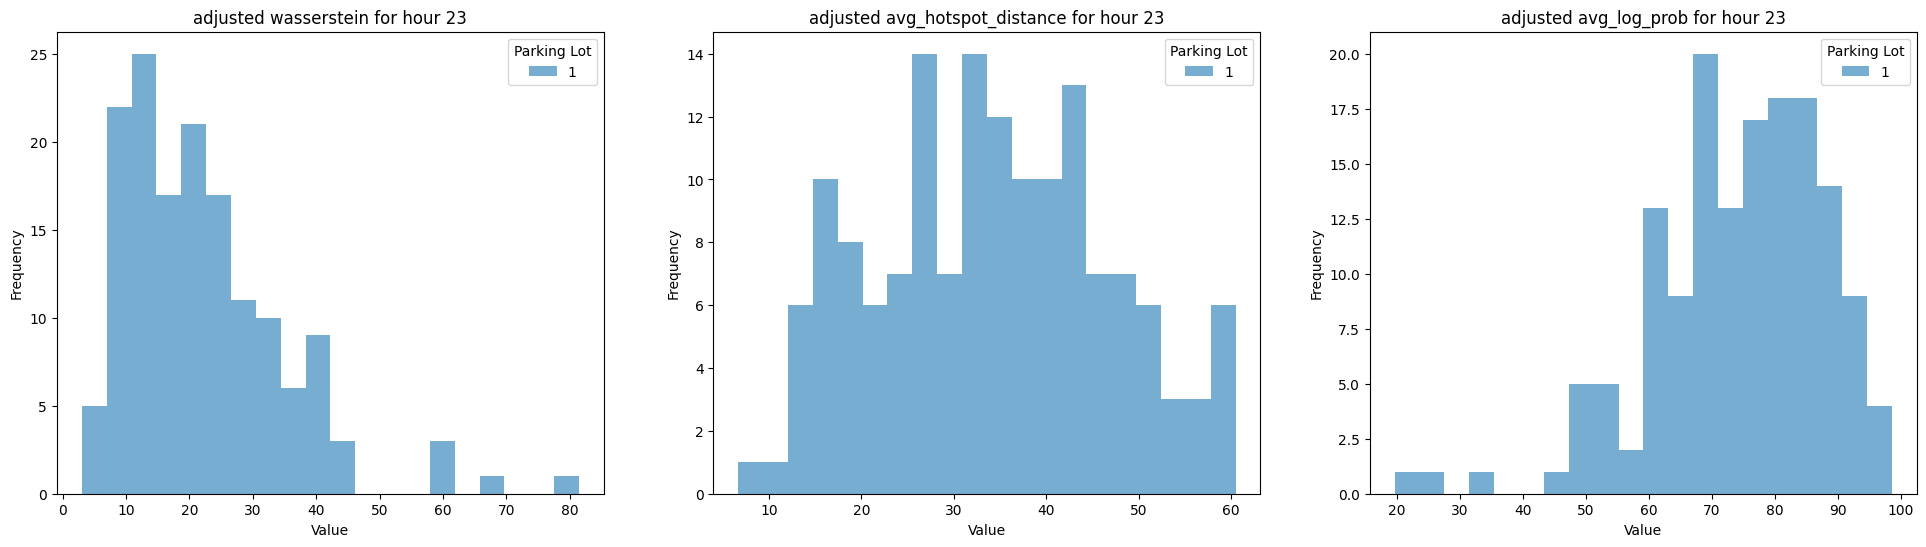

In [82]:
min_time = X['timestamp'].min()
X['hour_in_day'] = X['timestamp'].dt.hour

feautres = ['adjusted wasserstein', 'adjusted avg_hotspot_distance', 'adjusted avg_log_prob']
for hour in range(24):
    X_hour = X[X['hour_in_day'] == hour]
    # plot a histogram of the distribution of each feature for each of the 6 lots
    plt.figure(figsize=(24, 6))
    for lot_id in lot_ids:
        X_lot = X_hour[X_hour['pk_lot'] == lot_id]
        for i, feature in enumerate(feautres):
            plt.subplot(1, 3, i + 1)
            plt.hist(X_lot[feature], bins=20, alpha=0.6, label=lot_id)
            plt.title(f'{feature} for hour {hour}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.legend(title='Parking Lot')
    plt.show()